In [ ]:
import sys
sys.path.append('../src/')

import ndjson
import pandas as pd
import numpy as np

from umap import UMAP
from top2vec import Top2Vec

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from chronicles.entropies import InfoDynamics, jsd
from chronicles.entropies.afa import adaptive_filter

In [5]:
TOP2VEC_PATH = "../models/top2vec/top2vecmodel_220504"
PRIMITIVES_PATH = "../data/primitives_220503/primitives_corrected_daily.ndjson"

model = Top2Vec.load(TOP2VEC_PATH)

with open(PRIMITIVES_PATH) as fin:
    primitives = ndjson.load(fin)

proto_path_0 = '../models/220815_fulldocs_day/prototypes.ndjson'

with open(proto_path_0) as fin:
    prot0 = ndjson.load(fin)
    prot0_df = pd.DataFrame(prot0)

In [6]:
# set up indexing dicts
doc_id2vectoridx = model.doc_id2index
doc_id2primidx = {doc['id']: i for i, doc in enumerate(primitives)}

# vector object
modeldv = model.model.dv

def find_vec(doc_id):
    return modeldv[
        doc_id2vectoridx[doc_id]
        ]

# most representative vectors
vectors0 = [find_vec(doc_id) for doc_id in prot0_df['id'].tolist()]
vectors0 = np.vstack(vectors0)

In [7]:
# projection
vectors0_2d = UMAP(random_state=42).fit_transform(X=vectors0)

# assign back
prot0_df['X'] = vectors0_2d[:, 0]
prot0_df['Y'] = vectors0_2d[:, 1]



In [8]:
prot0_df['year'] = [int(date[0:4]) for date in prot0_df['clean_date'].tolist()]

peak_years = [1567, 1568, 1661, 1662, 1663, 1664, 1665, 1746, 1747, 1788, 1789]
prot0_df['in_peak'] = [True if year in peak_years else False for year in prot0_df['year'].tolist()]

/Users/au582299/.pyenv/versions/3.9.7/envs/chron_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'most representative primitives')

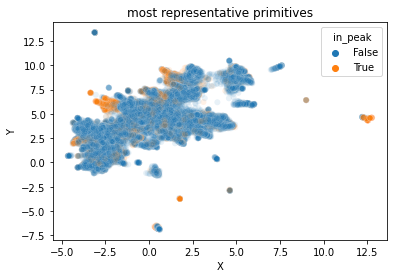

In [9]:
sns.scatterplot(prot0_df['X'], prot0_df['Y'], hue=prot0_df['in_peak'], alpha=0.1)
plt.title('most representative primitives')

Text(0, 0.5, 'number of unique sources per year')

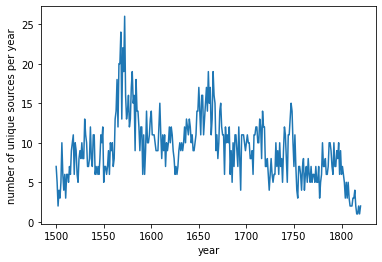

In [16]:
# number of unique chroniclers per year
df_call_overview = prot0_df.groupby(['year', 'call_nr'])['call_nr'].size().to_frame().rename(columns={'call_nr': 'n_docs'}).reset_index()
unique_calls_p_year = df_call_overview.groupby('year')['call_nr'].count().reset_index().rename(columns={'call_nr': 'n_calls'})

sns.lineplot(
    x=unique_calls_p_year['year'],
    y=unique_calls_p_year['n_calls']
)
plt.ylabel('number of unique sources per year')


Text(0.5, 1.0, 'sample document vector')

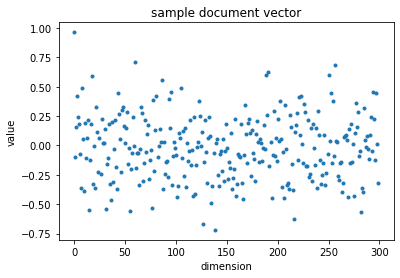

In [15]:
# sample vector
plt.plot(vectors0[0], '.')
plt.xlabel('dimension')
plt.ylabel('value')
plt.title('sample document vector')